In [1]:
# import mpld3
# mpld3.enable_notebook()
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from kneed import KneeLocator
%matplotlib inline

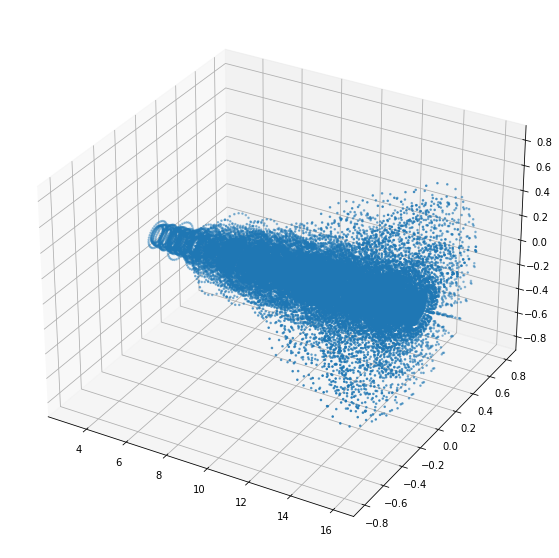

In [2]:
path = "3Ddata/contrails1/0.2.csv"

df = pd.read_csv(path)

icedf = df[df.iceLabel == 1]

clusterdf = icedf[['Points:0', 'Points:1', 'Points:2']]

data = clusterdf[["Points:0","Points:1","Points:2"]].to_numpy()

# %matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], s=2.5)
# ax.view_init(azim=200)
plt.show()

In [3]:
neigh = NearestNeighbors(n_neighbors=6)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

53428


<IPython.core.display.Javascript object>


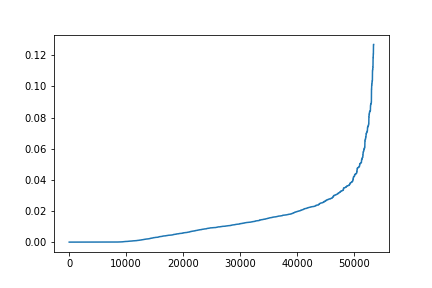

In [4]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
print(len(distances))
%matplotlib notebook
plt.plot(distances)

<IPython.core.display.Javascript object>


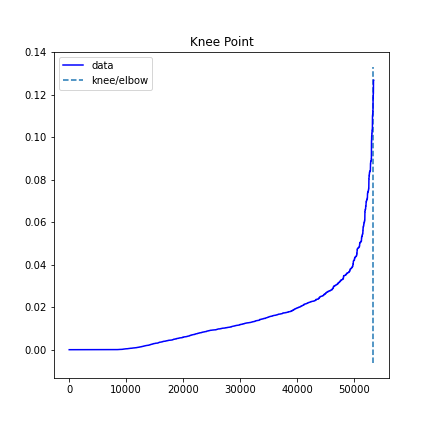

0.126912965856111


In [8]:
kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                      distances, # y values
                      S=1.0, #parameter suggested from paper
                      curve="concave", #parameter from figure
                      direction="increasing", #parameter from figure
                      online=True
                     ) 

kneedle.plot_knee()
print(kneedle.knee_y)
epsilon = kneedle.knee_y

In [9]:
m = DBSCAN(eps=epsilon, min_samples=50)
m.fit(data)

DBSCAN(eps=0.126912965856111, min_samples=50)

In [10]:
clusters = m.labels_
print("number of cluster found: {}".format(len(set(m.labels_))))
print('cluster for each point: ', m.labels_)

number of cluster found: 6
cluster for each point:  [0 0 0 ... 4 4 4]


In [11]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

<IPython.core.display.Javascript object>


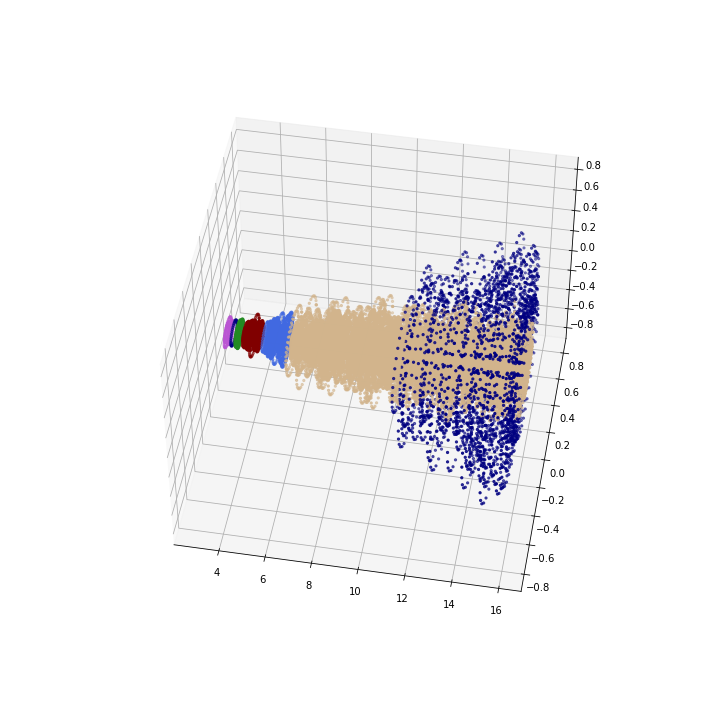

In [12]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], c=vectorizer(clusters), s=5)
# ax.view_init(0)
plt.show()